# Advanced configurations

In [1]:
import io

import matplotlib.pyplot as plt
import numpy as np
import PIL

from tueplots import cycler, figsizes, markers
from tueplots.constants import markers as marker_constants
from tueplots.constants.color import palettes

# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})

## Mosaic-style subplots where one subplot is loaded from a file


Use a package to include the svg into a matplotlib figure. For example, [CairoSVG](https://cairosvg.org/). But [other options exist, too](https://stackoverflow.com/questions/31452451/importing-an-svg-file-into-a-matplotlib-figure).

See [Issue 158](https://github.com/pnkraemer/tueplots/issues/158#issuecomment-2647554134) for context.


In [16]:
import cairosvg

In [17]:
# One plot contains an imshow of a random matrix
A = np.random.normal(size=(8, 8))

# The other plots contain the usual lines from the other tutorials
x = np.linspace(0, np.pi, 25)
offsets = np.linspace(0, 2 * np.pi, 7, endpoint=False)
yy = [np.sin(x + phi) for phi in offsets]

Save an imshow-plot of the random matrix as an SVG to have something to load later.

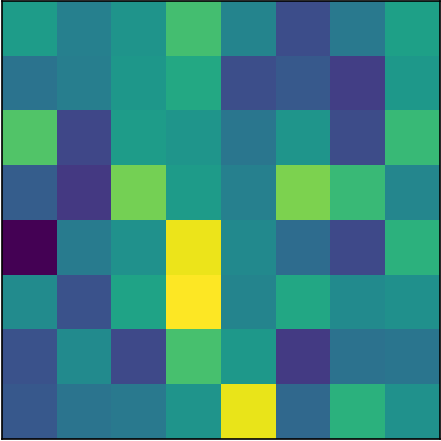

In [19]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.imshow(A)
plt.xticks(())
plt.yticks(())
plt.savefig("figure.svg")
plt.show()

Load the SVG into a format that matplotlib can plot. This is where an external library comes in.

In [20]:
img_png = cairosvg.svg2png(url="figure.svg")
img_bt = io.BytesIO(img_png)
img = PIL.Image.open(img_bt)

Use Tueplots to define the figure size as usual.

In [21]:
plt.rcParams.update(figsizes.iclr2024(nrows=2))

Create a mosaic subplot and plot all components.

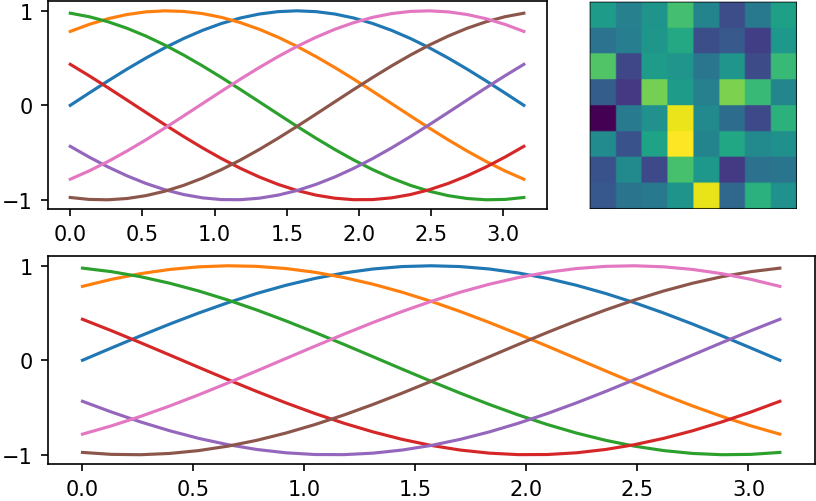

In [22]:
layout = [["A", "A", "A", "A", "B", "B"], ["C", "C", "C", "C", "C", "C"]]
fig, ax = plt.subplot_mosaic(layout)

# Remove xticks and axes from the "B" plot
for where in ["left", "right", "top", "bottom"]:
    ax["B"].spines[where].set_visible(False)

ax["B"].set_xticks(())
ax["B"].set_yticks(())


# Plot all curves

ax["B"].imshow(img)

for y in yy:
    ax["A"].plot(x, y)
    ax["C"].plot(x, y)

plt.show()